# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
import pandas as pd

In [2]:
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
%matplotlib inline

In [3]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = "traffic-sign-data/train.p"
testing_file = "traffic-sign-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
# Basic data summary.

n_train = len(X_train)
n_test = len(X_test)
image_shape = X_train[0].shape
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Sample images


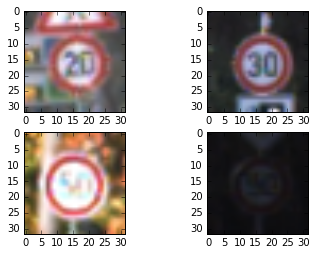

In [5]:
# Plot four sample images
print('Sample images')
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(X_train[i*1500+1])

[]

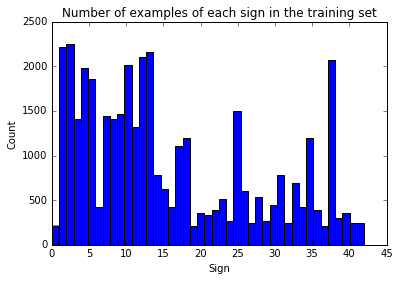

In [6]:
# Plot a histogram of the count of the number of examples of each sign
# in the test set

plt.hist(y_train, bins=n_classes)
plt.title('Number of examples of each sign in the training set')
plt.xlabel('Sign')
plt.ylabel('Count')
plt.plot()

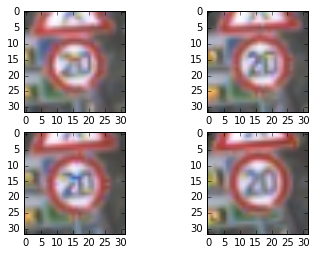

In [7]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(X_train[i])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### 2.1 Preprocess Data (includes shuffling)

There are three types of preprocessing to compare:
* No preprocessing
* Grayscale
* Normalise only
* Grayscele and normalise

In [8]:
# shuffle
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

#### 2.1.1 Grayscale (unused)

In [9]:
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [10]:
# Make images grayscale
X_train_gray = [grayscale(img) for img in X_train]
X_test_gray = [grayscale(img) for img in X_test]

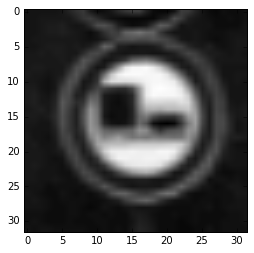

In [11]:
plt.imshow(X_train_gray[0], cmap="gray")

#### 2.2.2 Standardisation and Normalisation

In [12]:
X_train_orig = X_train
X_test_orig = X_test

In [13]:
# Standardise input (images still in colour)
X_train_std = (X_train - X_train.mean()) / np.std(X_train)
X_test_std = (X_test - X_test.mean()) /np.std(X_test)

# Normalise input (images still in colour)
X_train_norm = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
X_test_norm = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))

In [14]:
def plot_norm_image(image_index):
    plt.subplot(2,2,1)
    plt.imshow(X_train_orig[image_index])
    plt.subplot(2,2,2)
    plt.imshow(X_train_norm[image_index])
    plt.subplot(2,2,3)
    plt.imshow(X_train_std[image_index])

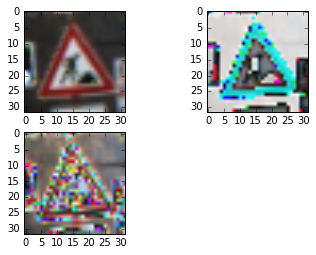

In [15]:
plot_norm_image(20)

In [16]:
# Choose normalised data as input
X_train = X_train_norm
X_test = X_test_norm

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**
* I decided not to grayscale the data because colours may be relevant. For example, a stop sign might be an upside-down red triangle, and knowing the colour of the triangle may help us predict the sign correctly. 
* I normalised the data. I found that normalising the data (as opposed to standardising it) gives the higher validation and training accuracy for a two-layer feedforward network.

### 2.2 Split into training and test sets (description only, did this in 2.1)

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

* Training and test data were already separated (downloaded pickled files `train.p` and `test.p`).
* I **shuffled the training data** because they were arranged in ascending order by label. If I don't shuffle the training data, the first series of batches will all be the first type of sign followed by the second type and so on. This will distort the learning process.
* TODO (Improvement): Split training data into training and validation sets.

### 2.3 Model Architecture

In [17]:
# Network Parameters
n_classes = 43

# Data input (32*32*3), for multilayer perceptron or other models
# that take flattened X as input
n_input = 3072 

In [18]:
# tf Graph input

## Grayscale vs colour input
# Grayscale version:
# x_unflattened_gray = tf.placeholder("float", [None, 32, 32])

# Color version:
x_unflattened_colour = tf.placeholder("float", [None, 32, 32, 3])
x_unflattened = x_unflattened_colour

## Flattened vs unflattened input
# Retain unflattened for convolutions
# x = x_unflattened_colour

# Flattened data

# Flatten data? 
x = tf.reshape(x_unflattened, [-1, n_input])

## One-hotted vs raw input
# Raw labels
y_rawlabels = tf.placeholder("int32", [None])
y = tf.one_hot(y_rawlabels, depth=43, on_value = 1., off_value = 0., axis=-1)

# If input has already been one-hotted:
# y = tf.placeholder("float", [None, n_classes])

In [24]:
# NEW: initiallise neurons with slightly positive initial bias 
# to avoid dead neurons.
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    # alt: tf.random_normal(shape)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def random_normal_variable(shape):
    return tf.Variable(tf.random_normal(shape))

### 2.3.1 Multilayer perceptron model

In [19]:
# Multilayer perceptron model

def multilayer_perceptron(x, weights, biases):
    # Layer with ReLU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with ReLU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    # Linear activatino means you don't add ReLU.
    # You just return Wx + b (which is what you have in prev layers
    # before you add ReLU)
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [198]:
# Multilayer perceptron parameters

n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features

# Store layers weight & bias

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

### 2.3.2 Two-layer feedforward network

In [26]:
n_fc1 = 512
n_fc2 = 128

In [31]:
def two_feedforward_network(x, weights, biases, dropout):
    # Fully connected layer 1
    fc1 = tf.add(tf.matmul(x, weights['fc1']), biases['fc1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)
    # Fully connected layer 2
    fc2 = tf.add(tf.matmul(fc1, weights['fc2']), biases['fc2'])
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, dropout)
    # Output layer
    output = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    # Note: Softmax is outside the model
    return output

weights = {
    'fc1': weight_variable([n_input, n_fc1]),
    'fc2': weight_variable([n_fc1, n_fc2]),
    'out': weight_variable([n_fc2, n_classes])
}

biases = {
    'fc1': bias_variable([n_fc1]),
    'fc2': bias_variable([n_fc2]),
    'out': bias_variable([n_classes])
}

### 2.3.3 Convolutional neural network

In [19]:
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    # strides = [batch, in_height, in_width, channels]
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')

In [20]:
# Create model
def conv_net(x, weights, biases, dropout):
    # Reshape input picture
    # x = tf.reshape(x, shape=[-1, 32, 32, 3])
    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [ ]:
# CNN weights and biases

# Store layers weight & bias
"""
weights = {
    # 5x5 conv, 1 input, 32 outputs
    # CHANGE IF SWITCH TO GRAYSCALE OR COLOR
    'wc1': weight_variable([5, 5, 3, 32]),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': weight_variable([5, 5, 32, 64]),
    # fully connected, 8*8*64 inputs, 1024 outputs
    'wd1': weight_variable([4096, 1024]),
    # 1024 inputs, 43 outputs (class prediction)
    'out': weight_variable([1024, n_classes])
}

biases = {
    'bc1': bias_variable([32]),
    'bc2': bias_variable([64]),
    'bd1': bias_variable([1024]),
    'out': bias_variable([n_classes])
}
"""

References: 
https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/multilayer_perceptron.py


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**



* My final architecture is a 2-layer ConvNet.
* It consists of two convolution layers (feature extraction) followed by a single fully connected linear classifier.
* It network uses full colour information (all three channels).

### 2.4 Training the model

In [34]:
# Parameters
# TODO: Tune parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
dropout = 0.2
anneal_mod_frequency = 15
annealing_rate = 1

# Parameters for documentation purposes
display_step = 1
print_accuracy_mod_frequency = 5
initial_learning_rate = learning_rate

In [32]:
# Construct model

## Choose model:
# Multilayer perceptron
# pred = multilayer_perceptron(x, weights, biases)

# Two-layer feedforward network
pred = two_feedforward_network(x, weights, biases, dropout)

# CNN
# pred = conv_net(x, weights, biases, dropout)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

In [35]:
# Train model

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    
    # Initialise time logs
    init_time = time.time()
    epoch_time = init_time

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(n_train/batch_size)
        
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = np.array(X_train[i*batch_size:(i+1)*batch_size]), np.array(y_train[i*batch_size:(i+1)*batch_size])
            
            # Run optimization op (backprop) and cost op (to get loss value
            _, c = sess.run([optimizer, cost], feed_dict={x_unflattened_colour: batch_x, y_rawlabels: batch_y})
            
            # Compute average loss
            avg_cost += c / total_batch
        
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(avg_cost))
            last_epoch_time = epoch_time
            epoch_time = time.time()
            print("Time since start: ", epoch_time - init_time)
            print("Time since last epoch: ", epoch_time - last_epoch_time)
        
        # Anneal learning rate
        if (epoch + 1) % anneal_mod_frequency == 0:
            learning_rate = learning_rate * annealing_rate
            print("New learning rate: ", learning_rate)
        
        # Print accuracy once every [number] epochs   
        if (epoch + 1) % print_accuracy_mod_frequency == 0:
            correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            print("Accuracy (test):", accuracy.eval({x_unflattened: X_test, y_rawlabels: y_test}))
            
            # Update var so measurement of next epoch's training time is accurate
            epoch_time = time.time()
    
    print("Optimization Finished!")
            

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy (test):", accuracy.eval({x_unflattened: X_test, y_rawlabels: y_test}))
    
    # Print parameters for reference
    print("Parameters:")
    print("Learning rate (initial): ", initial_learning_rate)
    print("Anneal learning rate every ", anneal_mod_frequency, " epochs by ", 1 - annealing_rate)
    print("Learning rate (final): ", learning_rate)
    print("Training epochs: ", training_epochs)
    print("Batch size: ", batch_size)
    print("Dropout: ", dropout)

Epoch: 0001 cost= 4.212850914
Time since start:  7.57066011428833
Time since last epoch:  7.57066011428833
Epoch: 0002 cost= 3.504687526
Time since start:  16.08617115020752
Time since last epoch:  8.51551103591919
Epoch: 0003 cost= 3.507526119
Time since start:  25.695971965789795
Time since last epoch:  9.609800815582275
Epoch: 0004 cost= 3.492461999
Time since start:  34.11180400848389
Time since last epoch:  8.415832042694092
Epoch: 0005 cost= 3.491660507
Time since start:  42.00820207595825
Time since last epoch:  7.896398067474365
Accuracy (test): 0.0570071
Epoch: 0006 cost= 3.489993341
Time since start:  50.97561717033386
Time since last epoch:  7.853821039199829
Epoch: 0007 cost= 3.499334336
Time since start:  58.91685509681702
Time since last epoch:  7.941237926483154
Epoch: 0008 cost= 3.495936203
Time since start:  66.82036900520325
Time since last epoch:  7.9035139083862305
Epoch: 0009 cost= 3.494184143
Time since start:  74.79437494277954
Time since last epoch:  7.974005937

**Deprecated code**:
* Potential alternantive for batching:
`tf.train.batch([X_train, y_train], batch_size=100, enqueue_many=True)
`

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

* Type of optimiser: AdamOptimizer
* Batch size: 100
* Training Epochs: 15
* Learning rate: 0.01
* Dropout: 0.75
* n_hidden_1 = 256 # 1st layer number of features
* n_hidden_2 = 256 # 2nd layer number of features

*Aside*:

Additional info on AdamOptimizer from [StackOverflow](http://stats.stackexchange.com/questions/184448/difference-between-gradientdescentoptimizer-and-adamoptimizer-tensorflow) (mrry):
* tf.train.AdamOptimizer uses Kingma and Ba's Adam algorithm to control the learning rate. 
* Main advantage of Adam over the simple `tf.train.GradientDescentOptimizer`:
    * Uses moving averages of the parameters (momentum) -> enables Adam to use a larger effective step size, and the algorithm will converge to this step size without fine tuning. 
        * Bengio discusses the reasons for why this is beneficial in Section 3.1.1 of [this paper](http://arxiv.org/pdf/1206.5533.pdf). 
    * A simple tf.train.GradientDescentOptimizer would require more hyperparameter tuning before it would converge as quickly.'

* Disadvantage: 
    * Adam requires more computation to be performed for each parameter in each training step (to maintain the moving averages and variance, and calculate the scaled gradient); and more state to be retained for each parameter (approximately tripling the size of the model to store the average and variance for each parameter). 


### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

- I wanted to get a working model first. I started with a basic multilayer perceptron which I adapted from `TensorFlow-Examples`. I trained it for 15 epochs, which had an accuracy of 6% on the training and test sets. I then trained a two-layer convolutional neural network for 15 epochs which had an accuracy of 5-6% on the training and test sets. 
    - The accuracy was lower than I expected and the cost seemed high (of order 10^6 in the first epoch, 10^5 in the second and third and in the hundreds in the tenth epoch), so I adjusted parameters hoping to improve it before training for longer.
    - The cost reduced significantly (to single digits by the second epoch as opposed to order 10^5) after I added a small positive bias to the initial weights and biases. Strangely, the accuracy did not increase, but remained at 5-6%. The cost did not decrease significantly over the next 10 epochs either.
    - I went on Slack to see what results people were getting to get a feel for how wrong I was. I saw that people often trained their networks for hundreds of epochs so I thought it would be good to train my network for e.g. 100 epochs.
- I trained my network for over 130 epochs on an AWS EC2 instance and the model still had an accuracy of less than 6%. I am trying to figure out what went wrong.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### 3.1 New Images and the Model's Predictions

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._

**Answer:**

(Special characteristics of images are noted in the comments)

In [34]:
# Helper function to read image copied from lane lines project
def read_image_and_print_dims(image_path):
    """Reads and returns image.
    Helper function to examine how an image is represented.
    """
    #reading in an image
    image = mpimg.imread(image_path)
    #printing out some stats and plotting
    print('This image is:', type(image), 'with dimensions:', image.shape)
    plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image
    return image

This image is: <class 'numpy.ndarray'> with dimensions: (314, 236, 3)


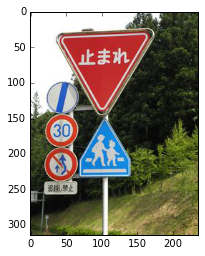

In [35]:
# This sign is not in English. It is a stop sign.
# There are multiple signs in the picture. 
# What wil the model attempt to recognise?
japanese_sign = read_image_and_print_dims('traffic-sign-data/japanese-sign.jpg')

This image is: <class 'numpy.ndarray'> with dimensions: (359, 478, 3)


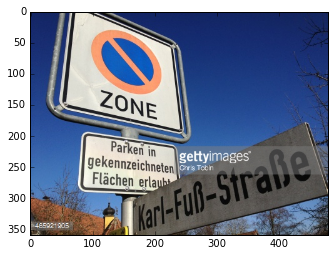

In [36]:
# There is other intervening text in the image.
# This sign is shown at an angle.
german_sign = read_image_and_print_dims('traffic-sign-data/german-sign.jpg')

This image is: <class 'numpy.ndarray'> with dimensions: (401, 350, 3)


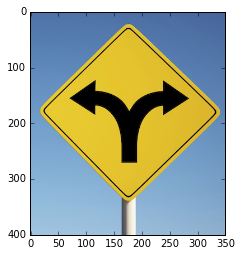

In [37]:
# This sign is quite clear.
two_way_sign = read_image_and_print_dims('traffic-sign-data/two-way-sign.jpg')

This image is: <class 'numpy.ndarray'> with dimensions: (1067, 1600, 3)


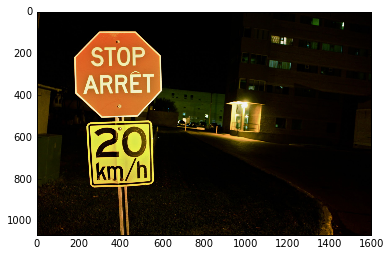

In [38]:
# Can the model recognise the 20 km/h sign as a speed limit sign
# even though it has different background colour, different shape
# and additional 'km/h' text?
speed_limit_stop = read_image_and_print_dims('traffic-sign-data/speed-limit-stop.JPG')

This image is: <class 'numpy.ndarray'> with dimensions: (1298, 1300, 3)


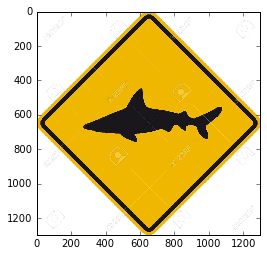

In [40]:
# What will the model think this is?
shark_sign = read_image_and_print_dims('traffic-sign-data/shark-sign.jpg')

In [44]:
shark_sign.shape

(1298, 1300, 3)

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
img = shark_sign
classification = sess.run(tf.argmax(y, 1), feed_dict={x: [img]})
plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
plt.show()
print 'NN predicted', classification[0]

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

My guess would be no because
1. Live camera stream is not limited to 32 x 32 images.
2. Images not included in the dataset are not exactly the same road signs so there is additional difficulty because the model needs to generalise well to classify these new signs correctly.


In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**
Not applicable at the moment.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.